In [148]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

ls: cannot access '/home/aistudio/data': No such file or directory


In [149]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

housing.data


In [150]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

mkdir: cannot create directory ‘/home/aistudio/external-libraries’: File exists
Looking in indexes: https://mirror.baidu.com/pypi/simple/
     |████████████████████████████████| 122kB 15.5MB/s eta 0:00:01


In [151]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')


In [152]:
# 导入需要用到的package
import matplotlib.pyplot as plt
import numpy as np
import json
# 读入训练数据
datafile = './work/housing.data'
data = np.fromfile(datafile, sep=' ')
data

array([6.320e-03, 1.800e+01, 2.310e+00, ..., 3.969e+02, 7.880e+00,
       1.190e+01])

In [153]:
# 读入之后的数据被转化成1维array，其中array的第0-13项是第一条数据，第14-27项是第二条数据，以此类推.... 
# 这里对原始数据做reshape，变成N x 14的形式
feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 
                 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
feature_num = len(feature_names)
data = data.reshape([data.shape[0] // feature_num, feature_num])

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [154]:
def load_data():
    # 从文件导入数据
    datafile = './work/housing.data'
    data = np.fromfile(datafile, sep=' ')

    # 每条数据包括14项，其中前面13项是影响因素，第14项是相应的房屋价格中位数
    feature_names = [ 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', \
                      'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV' ]
    feature_num = len(feature_names)

    # 将原始数据进行Reshape，变成[N, 14]这样的形状
    data = data.reshape([data.shape[0] // feature_num, feature_num])

    # 将原数据集拆分成训练集和测试集
    # 这里使用80%的数据做训练，20%的数据做测试
    # 测试集和训练集必须是没有交集的
    ratio = 0.8
    offset = int(data.shape[0] * ratio)
    training_data = data[:offset]

    # 计算训练集的最大值，最小值，平均值
    maximums, minimums, avgs = training_data.max(axis=0), training_data.min(axis=0), \
                                 training_data.sum(axis=0) / training_data.shape[0]
    global max_values
    global min_values
    global avg_values
    max_values = maximums
    min_values = minimums
    avg_values = avgs 
    # 对数据进行归一化处理
    for i in range(feature_num):
        #print(maximums[i], minimums[i], avgs[i])
            data[:, i] = (data[:, i] - minimums[i]) / (maximums[i] - minimums[i])

    # 训练集和测试集的划分比例
    training_data = data[:offset]
    test_data = data[offset:]
    return training_data, test_data

Epoch   0 / iter   0, loss = 9.3905
Epoch   0 / iter   1, loss = 53.2639
Epoch   0 / iter   2, loss = 19.5325
Epoch   0 / iter   3, loss = 0.3731
Epoch   0 / iter   4, loss = 0.1651
Epoch   1 / iter   0, loss = 0.2710
Epoch   1 / iter   1, loss = 0.2891
Epoch   1 / iter   2, loss = 0.3124
Epoch   1 / iter   3, loss = 0.2886
Epoch   1 / iter   4, loss = 0.2804
Epoch   2 / iter   0, loss = 0.3080
Epoch   2 / iter   1, loss = 0.2757
Epoch   2 / iter   2, loss = 0.3312
Epoch   2 / iter   3, loss = 0.2901
Epoch   2 / iter   4, loss = 0.1911
Epoch   3 / iter   0, loss = 0.3174
Epoch   3 / iter   1, loss = 0.2929
Epoch   3 / iter   2, loss = 0.3044
Epoch   3 / iter   3, loss = 0.3080
Epoch   3 / iter   4, loss = 0.4845
Epoch   4 / iter   0, loss = 0.2768
Epoch   4 / iter   1, loss = 0.3163
Epoch   4 / iter   2, loss = 0.2747
Epoch   4 / iter   3, loss = 0.3312
Epoch   4 / iter   4, loss = 0.4771
Epoch   5 / iter   0, loss = 0.2916
Epoch   5 / iter   1, loss = 0.2622
Epoch   5 / iter   2, loss

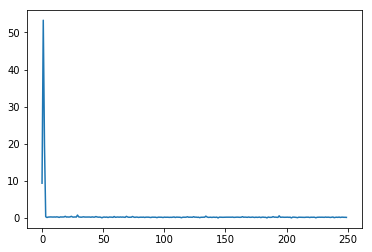

In [155]:
W1 = np.random.randn(13, 7)     
W2 = np.random.randn(7, 1)   
b1 = np.zeros((1, 7))                 
b2 = np.zeros((1, 1))                
def forward(x,w,b):
    z = np.dot(x,w) +b
    cache = (x,w,b)
    return z,cache

def backward(dout, cache):   
    x, w, b = cache                              # 读取缓存
    dx,dw, db = None, None, None                # 返回值初始化
    dx = np.dot(dout, w.T)                           
    dx = np.reshape(dx, x.shape)                   
    x_row = x.reshape(x.shape[0], -1)                
    dw = np.dot(x_row.T, dout)                       
    db = np.sum(dout, axis=0, keepdims=True)        
    return dx, dw, db
def loss(z, y):
    error = z - y
    num_samples = error.shape[0]
    cost = error * error
    cost = np.sum(cost) / num_samples
    return cost

                
# 获取数据
train_data, test_data = load_data()

# 启动训练
num_epochs=50
batch_size=100
eta=0.001
n = len(training_data)
losses = []
reg=0.001
for epoch_id in range(num_epochs):
    # 在每轮迭代开始之前，将训练数据的顺序随机打乱
    # 然后再按每次取batch_size条数据的方式取出
    np.random.shuffle(training_data)
    # 将训练数据进行拆分，每个mini_batch包含batch_size条的数据
    mini_batches = [training_data[k:k+batch_size] for k in range(0, n, batch_size)]
    for iter_id, mini_batch in enumerate(mini_batches):
        #print(self.w.shape)
        #print(self.b)
        x = mini_batch[:, :-1]
        y = mini_batch[:, -1:]
        H,fc_cache = forward(x,W1,b1)                 # 第一层前向传播
        H = np.maximum(0, H)                                 # 激活
        relu_cache = H                                       # 缓存第一层激活后的结果
        Y,cachey =forward(H,W2,b2)                   # 第二层前向传播    
        lossa = loss(Y, y)
        dx =Y                                  
        dh1, dW2, db2 = backward(dx,cachey)          # 反向传播至第二层前
        dh1[relu_cache <= 0] = 0                             # 反向传播至激活层前
        dX, dW1, db1 = backward(dh1, fc_cache)        # 反向传播至第一层前
        #参数更新
        dW2 += reg * W2
        dW1 += reg * W1
        W2 += -eta* dW2
        b2 += -eta * db2
        W1 += -eta * dW1
        b1 += -eta * db1
        losses.append(lossa)
        print('Epoch {:3d} / iter {:3d}, loss = {:.4f}'.format(epoch_id, iter_id, lossa))



# 画出损失函数的变化趋势
plot_x = np.arange(len(losses))
plot_y = np.array(losses)
plt.plot(plot_x, plot_y)
plt.show()


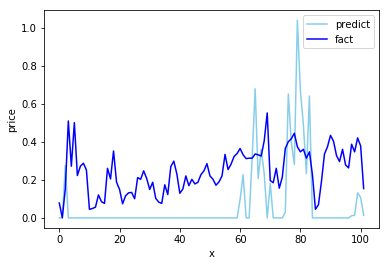

0.061569295066071145


In [156]:
#预测
x = test_data[:, :-1]
y = test_data[:, -1:]
H,fc_cache = forward(x,W1,b1)               #仿射
H = np.maximum(0, H)                                  #激活
relu_cache = H
Y,cachey =forward(H,W2,b2)  #仿射
lossa = loss(Y, y)

plt.plot(np.arange(len(x)), Y,  color='skyblue', label='predict')
plt.plot(np.arange(len(x)), y, color='blue', label='fact')
plt.legend()
 
plt.xlabel('x')
plt.ylabel('price')
plt.show()
print(lossa)


In [183]:
def load_one_example():
    # 从上边已加载的测试集中，随机选择一条作为测试数据
    idx = np.random.randint(0, test_data.shape[0])
    one_data, label = test_data[idx, :-1], test_data[idx, -1]
    # 修改该条数据shape为[1,13]
    one_data =  one_data.reshape([1,-1])

    return one_data, label


In [184]:
# 参数为数据集的文件地址
import numpy
one_data, label = load_one_example()
H,fc_cache = forward(one_data,W1,b1)               #仿射
H = np.maximum(0, H)                                  #激活
relu_cache = H
predict,cachey =forward(H,W2,b2)
# 对结果做反归一化处理
predict = predict * ( max_values[-1] - min_values[-1]) + avg_values[-1]
# 对label数据做反归一化处理
label = label * ( max_values[-1] - min_values[-1]) + avg_values[-1]

print("Inference result is {}, the corresponding label is {}".format(predict, label))

Inference result is [[46.14194497]], the corresponding label is 40.37574257425745
